Install H2O for python [http://h2o-release.s3.amazonaws.com/h2o/rel-tibshirani/3/index.html](http://h2o-release.s3.amazonaws.com/h2o/rel-tibshirani/3/index.html)  

```bash
sudo pip uninstall h2o
sudo pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
```

In [31]:
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

In [32]:
# Task 1: Connect to a cluster
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-macosx) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-macosx) (build 25.121-b15, mixed mode)
  Starting server from /Users/bear/anaconda/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/lh/42j8mfjx069d1bkc2wlf2pw40000gn/T/tmpcf28851q
  JVM stdout: /var/folders/lh/42j8mfjx069d1bkc2wlf2pw40000gn/T/tmpcf28851q/h2o_bear_started_from_python.out
  JVM stderr: /var/folders/lh/42j8mfjx069d1bkc2wlf2pw40000gn/T/tmpcf28851q/h2o_bear_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,"14 days, 2 hours and 55 minutes"
H2O cluster name:,H2O_from_python_bear_jpsd3w
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [33]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

In [34]:
# Task 2: Load data - 1 row per flight.  Has columns showing the origin,
# destination, departure and arrival time, carrier information, and
# whether the flight was delayed.
print("Import and Parse airlines data")
data = h2o.import_file(path='data/allyears2k.csv')
data.describe()

Import and Parse airlines data
Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:43978
Cols:31




,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
type,int,int,int,int,int,int,int,int,enum,int,enum,int,int,int,int,int,enum,enum,int,int,int,int,enum,int,int,int,int,int,int,enum,enum
mins,1987.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,,1.0,,16.0,17.0,14.0,-63.0,-16.0,,,11.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,
mean,1997.5,1.4090909090909092,14.601073263904679,3.8206148528809845,1345.846661382076,1313.2228614307153,1504.6341303788888,1485.289167310928,,818.8429896766563,,124.81452913540424,125.02156260661893,114.31611109078267,9.317111936984317,10.007390655600112,,,730.1821905650505,5.3813680595306215,14.168634184732063,0.024694165264450407,,0.0024785119832643593,4.047800291055637,0.28937646927124144,4.855031904175528,0.017015560282100082,7.620060450016791,,
maxs,2008.0,10.0,31.0,7.0,2400.0,2359.0,2400.0,2359.0,,3949.0,,475.0,437.0,402.0,475.0,473.0,,,3365.0,128.0,254.0,1.0,,1.0,369.0,201.0,323.0,14.0,373.0,,
sigma,6.344360901710564,1.874711371343963,9.17579042586145,1.905013119132896,465.3408991242338,476.25113999259963,484.347487903516,492.750434122701,,777.4043691636348,,73.97444166059019,73.4015946300093,69.63632951506105,29.840221962414844,26.43880904291645,,,578.4380082304244,4.201979939864827,9.905085747204327,0.15519314135784237,,0.049723487218862286,16.205729904484198,4.416779898734125,18.61977622147568,0.40394018210151184,23.487565874106213,,
zeros,0,0,0,0,0,569,0,569,,0,,0,0,0,1514,6393,,,0,623,557,42892,,43869,7344,8840,7388,8914,7140,,
missing,0,0,0,0,1086,0,1195,0,0,0,32,1195,13,16649,1195,1086,0,0,35,16026,16024,0,9774,0,35045,35045,35045,35045,35045,0,0
0,1987.0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,PS,1451.0,NA,91.0,79.0,nan,23.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES
1,1987.0,10.0,15.0,4.0,729.0,730.0,903.0,849.0,PS,1451.0,NA,94.0,79.0,nan,14.0,-1.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,NO
2,1987.0,10.0,17.0,6.0,741.0,730.0,918.0,849.0,PS,1451.0,NA,97.0,79.0,nan,29.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES


In [35]:
# ----------

# 2- Data exploration and munging. Generate scatter plots 
# of various columns and plot fitted GLM model.

# Function to fit a GLM model and plot the fitted (x,y) values
def scatter_plot(data, x, y, max_points = 1000, fit = True):
    if(fit):
        lr = H2OGeneralizedLinearEstimator(family = "gaussian")
        lr.train(x=x, y=y, training_frame=data)
        coeff = lr.coef()
    df = data[[x,y]]
    runif = df[y].runif()
    df_subset = df[runif < float(max_points)/data.nrow]
    df_py = h2o.as_list(df_subset)
    
    if(fit): h2o.remove(lr._id)

    # If x variable is string, generate box-and-whisker plot
    if(df_py[x].dtype == "object"):
        if interactive: df_py.boxplot(column = y, by = x)
    # Otherwise, generate a scatter plot
    else:
        if interactive: df_py.plot(x = x, y = y, kind = "scatter")
    
    if(fit):
        x_min = min(df_py[x])
        x_max = max(df_py[x])
        y_min = coeff["Intercept"] + coeff[x]*x_min
        y_max = coeff["Intercept"] + coeff[x]*x_max
        plt.plot([x_min, x_max], [y_min, y_max], "k-")
    if interactive: plt.show()


glm Model Build progress: |███████████████████████████████████████████████| 100%


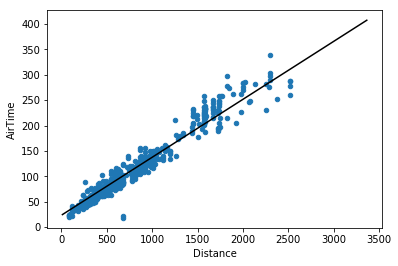

/Users/bear/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


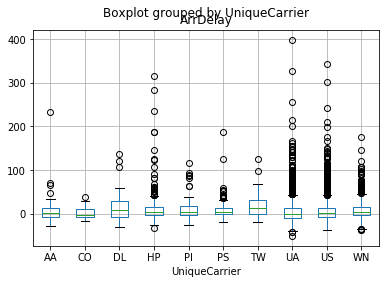

In [36]:
# Task 3: Generate scatterplots for "Distance" and "Airtime" and one for "Unique Carrier" and the "ArrDelay" 
scatter_plot(data, "Distance", "AirTime", fit = True)
scatter_plot(data, "UniqueCarrier", "ArrDelay", max_points = 5000, fit = False)

In [37]:
# Task 4: Use the .group_by function to group flights by month 
grouped = data.group_by("Month")
bpd = grouped.count().sum("Cancelled").frame
bpd.show()
bpd.describe()
bpd.dim


Month,nrow,sum_Cancelled
1,41979,1067
10,1999,19


Rows:2
Cols:3




,Month,nrow,sum_Cancelled
type,int,int,int
mins,1.0,1999.0,19.0
mean,5.5,21989.0,543.0
maxs,10.0,41979.0,1067.0
sigma,6.363961030678928,28270.12911183817,741.0479066835018
zeros,0,0,0
missing,0,0,0
0,1.0,41979.0,1067.0
1,10.0,1999.0,19.0


[2, 3]

In [38]:
# Task 5: Convert the "Year," "Month," "DayOfWeek," "Cancelled" columns to factors
data["Year"]      = data["Year"]     .asfactor()
data["Month"]     = data["Month"]    .asfactor()
data["DayOfWeek"] = data["DayOfWeek"].asfactor()
data["Cancelled"] = data["Cancelled"].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%


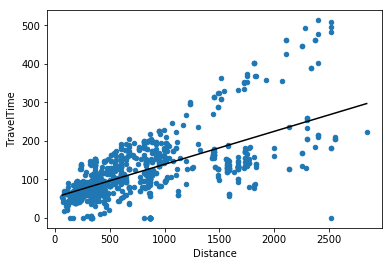

In [39]:
# Calculate and plot travel time
hour1 = data["CRSArrTime"] / 100
mins1 = data["CRSArrTime"] % 100
arrTime = hour1*60 + mins1

hour2 = data["CRSDepTime"] / 100
mins2 = data["CRSDepTime"] % 100
depTime = hour2*60 + mins2


data["TravelTime"] = (arrTime-depTime > 0).ifelse((arrTime-depTime), h2o.H2OFrame([[None]] * data.nrow))
scatter_plot(data, "Distance", "TravelTime")

glm Model Build progress: |███████████████████████████████████████████████| 100%


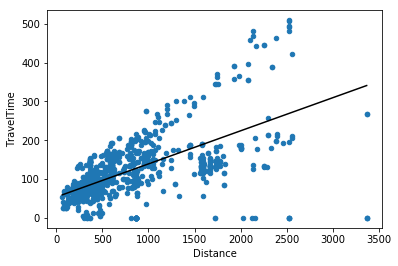

In [40]:
# Task 6: Impute missing travel times by the "Origin" and "Dest" columns and re-plot. 
data.impute(column = "Distance", by = ["Origin", "Dest"])
scatter_plot(data, "Distance", "TravelTime")

In [41]:
# Task 7: Create a test/train split
train,test = data.split_frame([.9])

In [42]:
# Task 8: Set response variable and your choice of predictor variables
myY = "IsDepDelayed"
myX = ["Origin", "Dest", "Year", "UniqueCarrier", "DayOfWeek", "Month", "Distance", "FlightNum"]

In [43]:
# Task 9: Build simple GLM model

data_glm = H2OGeneralizedLinearEstimator(family="binomial", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)


glm Model Build progress: |███████████████████████████████████████████████| 100%


In [44]:
# Task 10: Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        distribution   ="bernoulli",
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [45]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])
    
# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

data_glm.varimp()
data_gbm.varimp()

Variable Importances:

| Predictor        |   Normalized Coefficient |
|------------------+--------------------------|
| Year.2008        |              2.23648     |
| Origin.MDW       |              1.58218     |
| Year.2003        |              1.57131     |
| Origin.HPN       |              1.55316     |
| Dest.LYH         |              1.41372     |
| Year.2007        |              1.4014      |
| Origin.LIH       |              1.3322      |
| Dest.HTS         |              1.21597     |
| Origin.LEX       |              1.20948     |
| UniqueCarrier.HP |              1.20419     |
| Origin.TLH       |              1.10634     |
| Origin.CAE       |              1.09369     |
| Origin.HNL       |              1.05937     |
| Origin.LBB       |              1.03871     |
| Year.2001        |              1.03786     |
| Origin.BTV       |              1.02759     |
| UniqueCarrier.TW |              1.01851     |
| Year.2002        |              1.01473     |
| Origin.ERI     

| DayOfWeek.1      |              0           |


[('Year', 2932.593505859375, 1.0, 0.8491710335609072),
 ('Origin', 520.884521484375, 0.17761906668743496, 0.15082896643909283),
 ('Month', 0.0, 0.0, 0.0),
 ('DayOfWeek', 0.0, 0.0, 0.0),
 ('UniqueCarrier', 0.0, 0.0, 0.0),
 ('FlightNum', 0.0, 0.0, 0.0),
 ('Dest', 0.0, 0.0, 0.0),
 ('Distance', 0.0, 0.0, 0.0)]

In [46]:
dir(data_glm)

['F0point5',
 'F1',
 'F2',
 'Lambda',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bc',
 '_bcin',
 '_check_and_save_parm',
 '_check_targets',
 '_compute_algo',
 '_end_time',
 '_estimator_type',
 '_future',
 '_get_metrics',
 '_have_mojo',
 '_have_pojo',
 '_id',
 '_is_xvalidated',
 '_job',
 '_keyify_if_h2oframe',
 '_metrics_class',
 '_model_json',
 '_parms',
 '_plot',
 '_requires_training_frame',
 '_resolve_model',
 '_run_time',
 '_start_time',
 '_verify_training_frame_params',
 '_xval_keys',
 'accuracy',
 'actual_params',
 'aic',
 'algo',
 'alpha',
 'auc',
 'balance_classes',
 'beta_constraints',
 'beta_epsilon',
 'biases',
 'catoffsets',
 'class_sa

/Users/bear/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


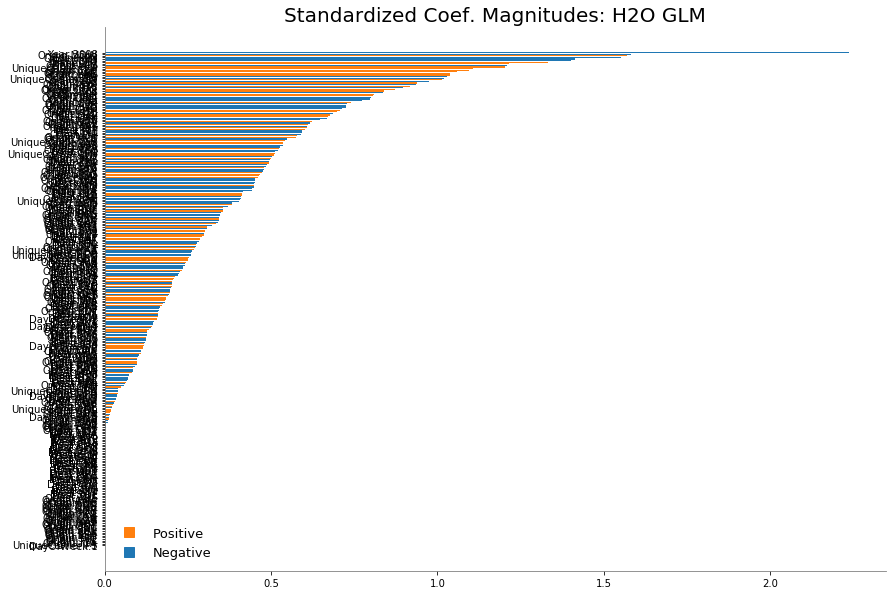

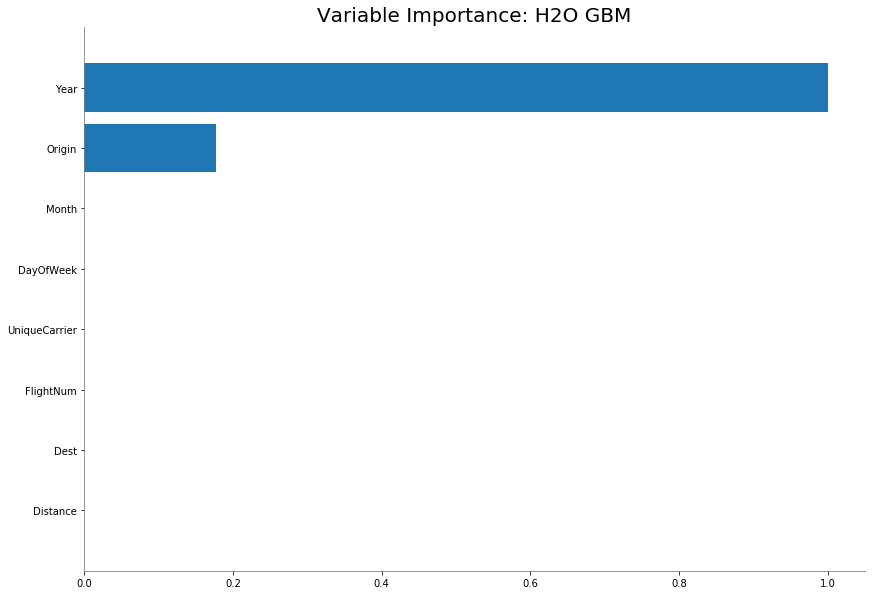

In [47]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

In [48]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.23578015654084256
RMSE: 0.48557198904059795
LogLoss: 0.6643704584465113
Mean Per-Class Error: 0.3657797830210392
AUC: 0.6645601692023206
pr_auc: 0.5323561417148603
Gini: 0.3291203384046413
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45237684869009187: 


,NO,YES,Error,Rate
NO,276.0,1889.0,0.8725,(1889.0/2165.0)
YES,99.0,2229.0,0.0425,(99.0/2328.0)
Total,375.0,4118.0,0.4425,(1988.0/4493.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4523768,0.6915917,22.0
max f2,0.4357455,0.8431728,23.0
max f0point5,0.5274961,0.6474941,14.0
max accuracy,0.5274961,0.6352103,14.0
max precision,0.6282162,0.7729008,0.0
max recall,0.4357455,1.0,23.0
max specificity,0.6282162,0.9450346,0.0
max absolute_mcc,0.5274961,0.2688204,14.0
max min_per_class_accuracy,0.5290360,0.6286374,13.0
max mean_per_class_accuracy,0.5274961,0.6342202,14.0


Gains/Lift Table: Avg response rate: 51.81 %, avg score: 52.66 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.1166259,0.6282162,1.4916852,1.4916852,0.7729008,0.6282162,0.7729008,0.6282162,0.1739691,0.1739691,49.1685193,49.1685193
,2,0.1573559,0.6102753,1.2233771,1.4222363,0.6338798,0.6110826,0.7369165,0.6237813,0.0498282,0.2237973,22.3377087,42.2236277
,3,0.2025373,0.5963080,1.2549642,1.3849217,0.6502463,0.5963080,0.7175824,0.6176527,0.0567010,0.2804983,25.4964197,38.4921736
,4,0.3040285,0.5686764,1.2824228,1.3507054,0.6644737,0.5836498,0.6998536,0.6063018,0.1301546,0.4106529,28.2422793,35.0705398
,5,0.4133096,0.5441812,1.1006012,1.2845766,0.5702648,0.5484776,0.6655897,0.5910128,0.1202749,0.5309278,10.0601200,28.4576609
,6,0.5083463,0.5290360,1.1028473,1.2506018,0.5714286,0.5302202,0.6479860,0.5796475,0.1048110,0.6357388,10.2847324,25.0601826
,7,0.6018251,0.5106785,0.7995643,1.1805442,0.4142857,0.5151591,0.6116864,0.5696308,0.0747423,0.7104811,-20.0435690,18.0544224
,8,0.8103717,0.4690445,0.8259585,1.0892927,0.4279616,0.4765677,0.5644054,0.5456813,0.1722509,0.8827320,-17.4041505,8.9292692
,9,0.9165368,0.4523768,0.7040189,1.0446653,0.3647799,0.4524299,0.5412822,0.5348797,0.0747423,0.9574742,-29.5981110,4.4665299
,10,1.0,0.4357455,0.5095155,1.0,0.264,0.4357455,0.5181393,0.5266056,0.0425258,1.0,-49.0484536,0.0


In [49]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

In [50]:
X=get_independent_variables(train, myY) 
print(X)
print(myY)

['DayofMonth', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Year', 'Month', 'DayOfWeek', 'UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'Cancelled', 'CancellationCode', 'IsArrDelayed', 'TravelTime']
IsDepDelayed


In [51]:
print(train.columns)

['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'IsArrDelayed', 'IsDepDelayed', 'TravelTime']


In [52]:
train.head()

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed,TravelTime
1987,10,14,3,741,730,912,849,PS,1451,NA,91,79,nan,23,11,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES,90.4
1987,10,15,4,729,730,903,849,PS,1451,NA,94,79,nan,14,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO,90.4
1987,10,17,6,741,730,918,849,PS,1451,NA,97,79,nan,29,11,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES,90.4
1987,10,18,7,729,730,847,849,PS,1451,NA,78,79,nan,-2,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,NO,NO,90.4
1987,10,19,1,749,730,922,849,PS,1451,NA,93,79,nan,33,19,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES,90.4
1987,10,21,3,728,730,848,849,PS,1451,NA,80,79,nan,-1,-2,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,NO,NO,90.4
1987,10,22,4,728,730,852,849,PS,1451,NA,84,79,nan,3,-2,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO,90.4
1987,10,23,5,731,730,902,849,PS,1451,NA,91,79,nan,13,1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES,90.4
1987,10,24,6,744,730,908,849,PS,1451,NA,84,79,nan,19,14,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES,90.4
1987,10,25,7,729,730,851,849,PS,1451,NA,82,79,nan,2,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO,90.4


In [53]:
# Set up AutoML
run_time=333
aml = H2OAutoML(max_runtime_secs=run_time)

In [54]:
model_start_time = time.time()
  
aml.train(x=X,y=myY,training_frame=train) 

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [55]:
execution_time = time.time() - model_start_time
print(execution_time)

338.415559053421


In [56]:
print(aml.leaderboard)

model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_2_AutoML_20190208_224411,1,0.000534486,0,0.000898293,8.0693e-07
XGBoost_1_AutoML_20190208_224411,1,0.000238567,0,0.000418267,1.74947e-07
StackedEnsemble_AllModels_AutoML_20190208_224411,1,0.00177019,0,0.00240546,5.78625e-06
StackedEnsemble_BestOfFamily_AutoML_20190208_224411,1,0.002285,0,0.0038932,1.5157e-05
DRF_1_AutoML_20190208_224411,1,0.0505812,0.000120406,0.0843813,0.0071202
XRT_1_AutoML_20190208_224411,0.999939,0.119422,0.0030556,0.165721,0.0274634
GLM_grid_1_AutoML_20190208_224411_model_1,0.975382,0.27614,0.0911293,0.284197,0.0807681


In [57]:
dir(aml)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_fetch',
 '_get_params',
 '_job',
 '_leader_id',
 '_leaderboard',
 'build_control',
 'build_models',
 'download_mojo',
 'download_pojo',
 'leader',
 'leaderboard',
 'max_models',
 'max_runtime_secs',
 'nfolds',
 'predict',
 'project_name',
 'sort_metric',
 'stopping_metric',
 'stopping_rounds',
 'stopping_tolerence',
 'train']

In [61]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

In [62]:
best_model.algo

'xgboost'

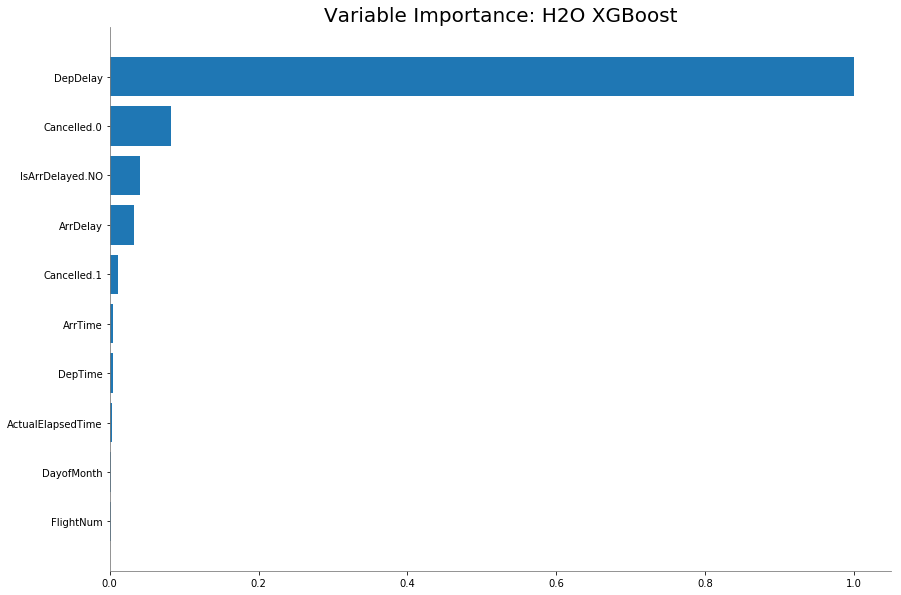

In [63]:
if best_model.algo in ['xgboost','drf','gbm']:
  best_model.varimp_plot()

In [64]:
dir(best_model)

['F0point5',
 'F1',
 'F2',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bc',
 '_bcin',
 '_check_and_save_parm',
 '_check_targets',
 '_compute_algo',
 '_end_time',
 '_estimator_type',
 '_future',
 '_get_metrics',
 '_have_mojo',
 '_have_pojo',
 '_id',
 '_is_xvalidated',
 '_job',
 '_keyify_if_h2oframe',
 '_metrics_class',
 '_model_json',
 '_parms',
 '_plot',
 '_requires_training_frame',
 '_resolve_model',
 '_run_time',
 '_start_time',
 '_verify_training_frame_params',
 '_xval_keys',
 'accuracy',
 'actual_params',
 'aic',
 'algo',
 'auc',
 'available',
 'backend',
 'biases',
 'booster',
 'categorical_encoding',
 'catoffsets',
 'coef',
 'coef_norm',
 'c

In [65]:
best_model.params

{'backend': {'actual': 'auto', 'default': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree'},
 'categorical_encoding': {'actual': 'AUTO', 'default': 'AUTO'},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0},
 'colsample_bylevel': {'actual': 1.0, 'default': 1.0},
 'colsample_bytree': {'actual': 1.0, 'default': 1.0},
 'distribution': {'actual': 'bernoulli', 'default': 'AUTO'},
 'dmatrix_type': {'actual': 'auto', 'default': 'auto'},
 'eta': {'actual': 0.3, 'default': 0.3},
 'export_checkpoints_dir': {'actual': None, 'default': None},
 'fold_assignment': {'actual': 'Modulo', 'default': 'AUTO'},
 'fold_column': {'actual': None, 'default': None},
 'gamma': {'actual': 0.0, 'default': 0.0},
 'gpu_id': {'actual': 0, 'default': 0},
 'grow_policy': {'actual': 'depthwise', 'default': 'depthwise'},
 'ignore_const_cols': {'actual': True, 'default': True},
 'ignored_columns': {'actual': [], 'default': None},
 'keep_cross_val

In [68]:
best_model.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9967505931854248: 


,NO,YES,Error,Rate
NO,18722.0,0.0,0.0,(0.0/18722.0)
YES,0.0,20763.0,0.0,(0.0/20763.0)
Total,18722.0,20763.0,0.0,(0.0/39485.0)


In [69]:
best_model.confusion_matrix(metrics=["f1","f2","f0point5","accuracy","precision","recall","specificity","absolute_mcc","min_per_class_accuracy","mean_per_class_accuracy"])

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9967505931854248: 


,NO,YES,Error,Rate
NO,18722.0,0.0,0.0,(0.0/18722.0)
YES,0.0,20763.0,0.0,(0.0/20763.0)
Total,18722.0,20763.0,0.0,(0.0/39485.0)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9967505931854248: 


,NO,YES,Error,Rate
NO,18722.0,0.0,0.0,(0.0/18722.0)
YES,0.0,20763.0,0.0,(0.0/20763.0)
Total,18722.0,20763.0,0.0,(0.0/39485.0)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9967505931854248: 


,NO,YES,Error,Rate
NO,18722.0,0.0,0.0,(0.0/18722.0)
YES,0.0,20763.0,0.0,(0.0/20763.0)
Total,18722.0,20763.0,0.0,(0.0/39485.0)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9967505931854248: 


,NO,YES,Error,Rate
NO,18722.0,0.0,0.0,(0.0/18722.0)
YES,0.0,20763.0,0.0,(0.0/20763.0)
Total,18722.0,20763.0,0.0,(0.0/39485.0)


Confusion Matrix (Act/Pred) for max precision @ threshold = 0.9999400696664487: 


,NO,YES,Error,Rate
NO,18722.0,0.0,0.0,(0.0/18722.0)
YES,20498.0,265.0,0.9872,(20498.0/20763.0)
Total,39220.0,265.0,0.5191,(20498.0/39485.0)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9967505931854248: 


,NO,YES,Error,Rate
NO,18722.0,0.0,0.0,(0.0/18722.0)
YES,0.0,20763.0,0.0,(0.0/20763.0)
Total,18722.0,20763.0,0.0,(0.0/39485.0)


Confusion Matrix (Act/Pred) for max precision @ threshold = 0.9999400696664487: 


,NO,YES,Error,Rate
NO,18722.0,0.0,0.0,(0.0/18722.0)
YES,20498.0,265.0,0.9872,(20498.0/20763.0)
Total,39220.0,265.0,0.5191,(20498.0/39485.0)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9967505931854248: 


,NO,YES,Error,Rate
NO,18722.0,0.0,0.0,(0.0/18722.0)
YES,0.0,20763.0,0.0,(0.0/20763.0)
Total,18722.0,20763.0,0.0,(0.0/39485.0)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9967505931854248: 


,NO,YES,Error,Rate
NO,18722.0,0.0,0.0,(0.0/18722.0)
YES,0.0,20763.0,0.0,(0.0/20763.0)
Total,18722.0,20763.0,0.0,(0.0/39485.0)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9967505931854248: 


,NO,YES,Error,Rate
NO,18722.0,0.0,0.0,(0.0/18722.0)
YES,0.0,20763.0,0.0,(0.0/20763.0)
Total,18722.0,20763.0,0.0,(0.0/39485.0)


[, , , , , , , , , ]

In [ ]:
# h2o.cluster().shutdown()